<a href="https://colab.research.google.com/github/Vasu9542/projectone/blob/master/House_Price_Prediction_using_XGBoost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [7]:

from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1)

In [11]:
boston.data.shape

(506, 13)

In [13]:
data=pd.DataFrame(boston.data)
data.columns=boston.feature_names

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [15]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
data.shape

(506, 14)

In [18]:
#check for missing values
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [17]:
data.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the correlation between previous features in the dataset

1. Positive correlation
2. Negative correlation

In [19]:
correlation=data.corr()

<Axes: >

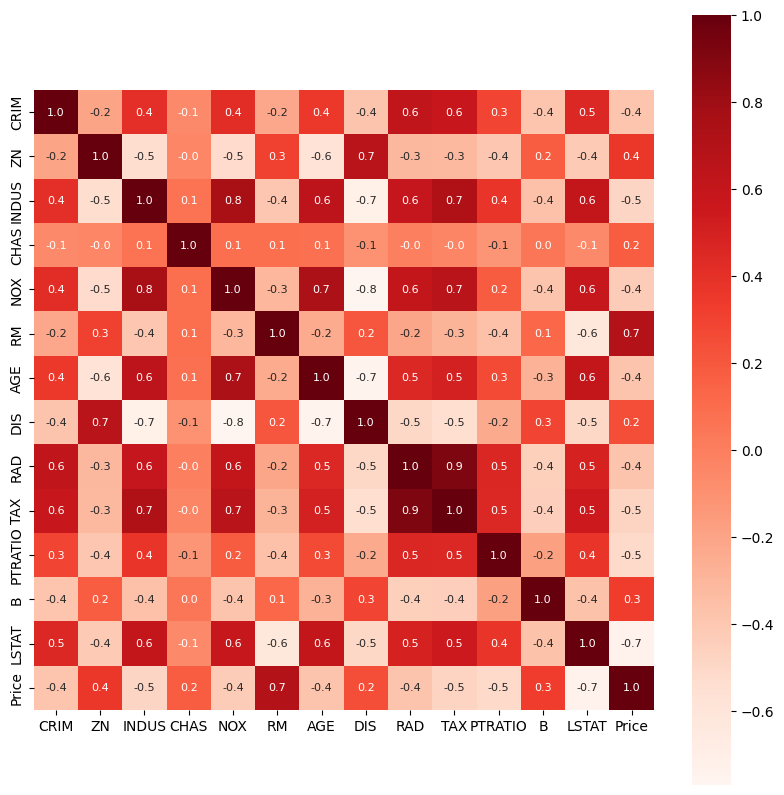

In [22]:
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Reds')

Spliting the data and target

In [24]:
x=data.drop(['Price'],axis=1)
y=data['Price']
print(x)
print(y)

        CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31    0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07    0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07    0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18    0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18    0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...  ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93    0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93    0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93    0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1      21.6
2  

Spliting the data into training and test data

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
x_train.shape

(404, 13)

In [28]:
x_test.shape

(102, 13)

Model Training

XGBoost Regressor

In [35]:
#loading the model
model=XGBRegressor(enable_categorical=True)

In [36]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training on data

In [37]:
#Accuracy for prediction on traing data
train_pred=model.predict(x_train)
print(train_pred)

[23.12537   20.993305  20.101828  34.698845  13.90048   13.498627
 21.999454  15.204494  10.898279  22.683517  13.804576   5.5999727
 29.800287  49.997086  34.899097  20.602865  23.385353  19.18291
 32.698814  19.600945  26.994783   8.395777  46.001015  21.715147
 27.077194  19.379717  19.300058  24.795628  22.610891  31.724024
 18.511816   8.700756  17.401417  23.702253  13.299225  10.512143
 12.678252  24.998468  19.690723  14.897103  24.204836  25.00939
 14.899758  16.997213  15.595185  12.692106  24.50731   15.006159
 50.001972  17.517784  21.202095  31.99562   15.607423  22.901945
 19.320164  18.720781  23.302368  37.205223  30.100294  33.103645
 21.010303  49.99931   13.399545   5.0076556 16.498867   8.398998
 28.66987   19.494442  20.597595  45.400585  39.803585  33.40453
 19.807894  33.4003    25.29777   49.998013  12.523513  17.439049
 18.603155  22.59679   50.004223  23.796879  23.307257  23.081825
 41.711502  16.112608  31.59987   36.09465    7.0044384 20.387278
 20.00197   

In [38]:
#R squared error
score_1=metrics.r2_score(y_train,train_pred)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,train_pred)
print('R squared error',score_1)
print('Mean Absolute Error',score_2)

R squared error 0.9999985261877631
Mean Absolute Error 0.007722842103183917


Visualizing the actual prices and predicted prices

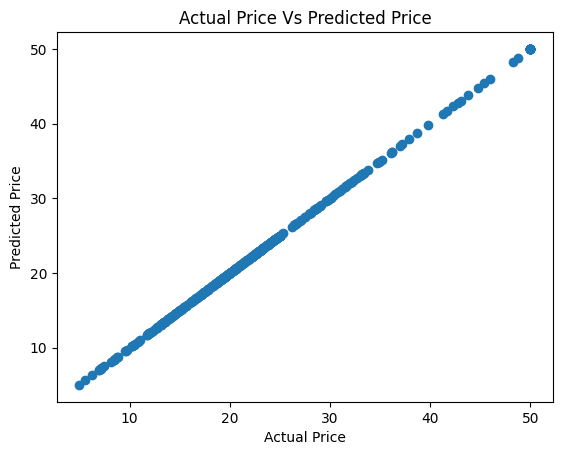

In [40]:
plt.scatter(y_train,train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

For testing data

In [39]:
test_pred=model.predict(x_test)
#R squared error
score_1=metrics.r2_score(y_test,test_pred)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_test,test_pred)
print('R squared error',score_1)
print('Mean Absolute Error',score_2)

R squared error 0.9110784518505095
Mean Absolute Error 2.075374621970981
